# The U.S. economy is entering a period of fiscal uncertainty and elevated inflation risk. Characterized with record national debt, rising interest expenses, and structural budget deficits.

- The Investments Committee has recently emphasized concerns around fiscal stress, interest rate pressures, and the potential crowding-out effects on private investment. (as per the Macroeconomics sector's commentary)

- In this environment, understanding how inflation evolves—and how different markets respond under different inflationary regimes—is essential for informed portfolio risk management and sector allocation.

---
## We look first to choose the data we wish to use to classify these inflationary regimes.
- We'll look at factors like the following:
    - From FRED: 
        - Consumer Price Index
        - GDP
        - Unemployment rates

    - From Yahoo Finance:
        - Sector returns (ie from XLF, XLK, XLY)
        - Market returns (SPY)
        - Volatility (in sectors and in market)
    
    - From US Treasury:
        - Yield Curve Spreads (10 year to 2 year, 10 year to 3 month)
        - interest rates
        
We aim to analyze a broad spread of regimes so we will look at the time from 2000-present (march 1st 2025). This includes the dot com bubble burst, the 2008 Financial crisis, covid, as well as the current macro environment.

We will import this data, and begin to analyze it's effect. 

In [1]:
import pandas as pd
import numpy as np

# Import Macroeconomic Data Monthly Time Frame from 2000 Jan 1 to 2025 March 1 (from FRED)

# Consumer Price Index for All Urban Consumers: All Items (Not seasonally adjusted)
CPIAUCNS = pd.read_csv("CPIAUCNS.csv", parse_dates=["DATE"]) 
CPIAUCNS_monthly_change = CPIAUCNS.copy()
CPIAUCNS_monthly_change["CPIAUCNS"] = CPIAUCNS["CPIAUCNS"].pct_change(periods=1) # Monthly change in CPI
CPIAUCNS_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0

# Consumer Price Index for All Urban Consumers: All Items Less Food and Energy (Seasonally adjusted)
CPILFESL = pd.read_csv("CPILFESL.csv", parse_dates=["DATE"]) 
CPILFESL_monthly_change = CPILFESL.copy()
CPILFESL_monthly_change["CPILFESL"] = CPILFESL["CPILFESL"].pct_change(periods=1) # Monthly change in CPI
CPILFESL_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0

# Unemployment Rate
UNRATE = pd.read_csv("UNRATE.csv", parse_dates=["DATE"]) # Unemployment Rate
UNRATE_monthly_change = UNRATE.copy()
UNRATE_monthly_change["UNRATE"] = UNRATE["UNRATE"].pct_change(periods=1) # Monthly change in Unemployment Rate
UNRATE_monthly_change.iloc[0, 1] = 0 # Replace the NaN value with 0

# Real GDP (NOTE THAT THIS IS QUARTERLY AND STOPS IN 2024 Q4 (Oct 1))
GDP = pd.read_csv("GDPC1.csv", parse_dates=["DATE"]) # Real GDP
GDP_quarterly_change = GDP.copy()
GDP_quarterly_change["GDP"] = GDP["GDPC1"].pct_change(periods=1) # Quarterly change in GDP
GDP_quarterly_change.iloc[0, 1] = 0 # Replace the NaN value with 0

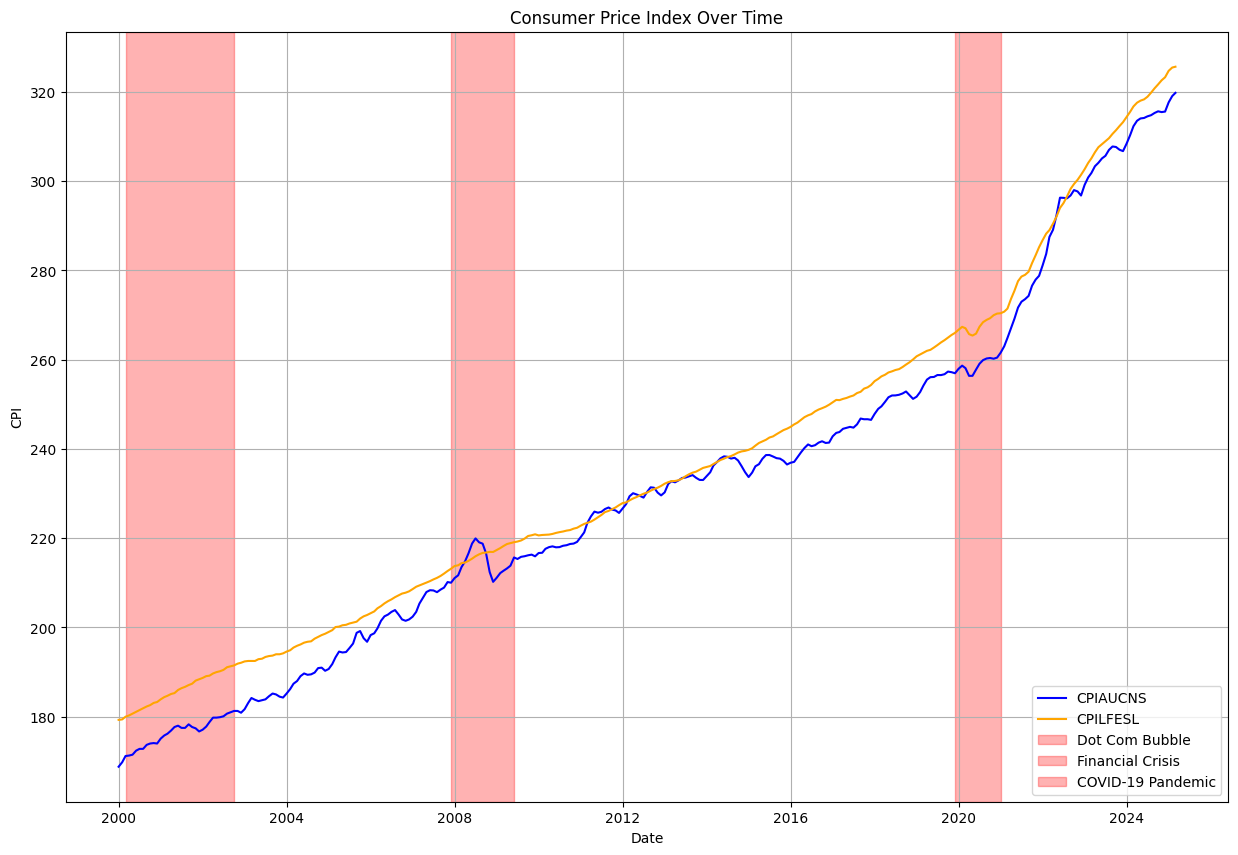

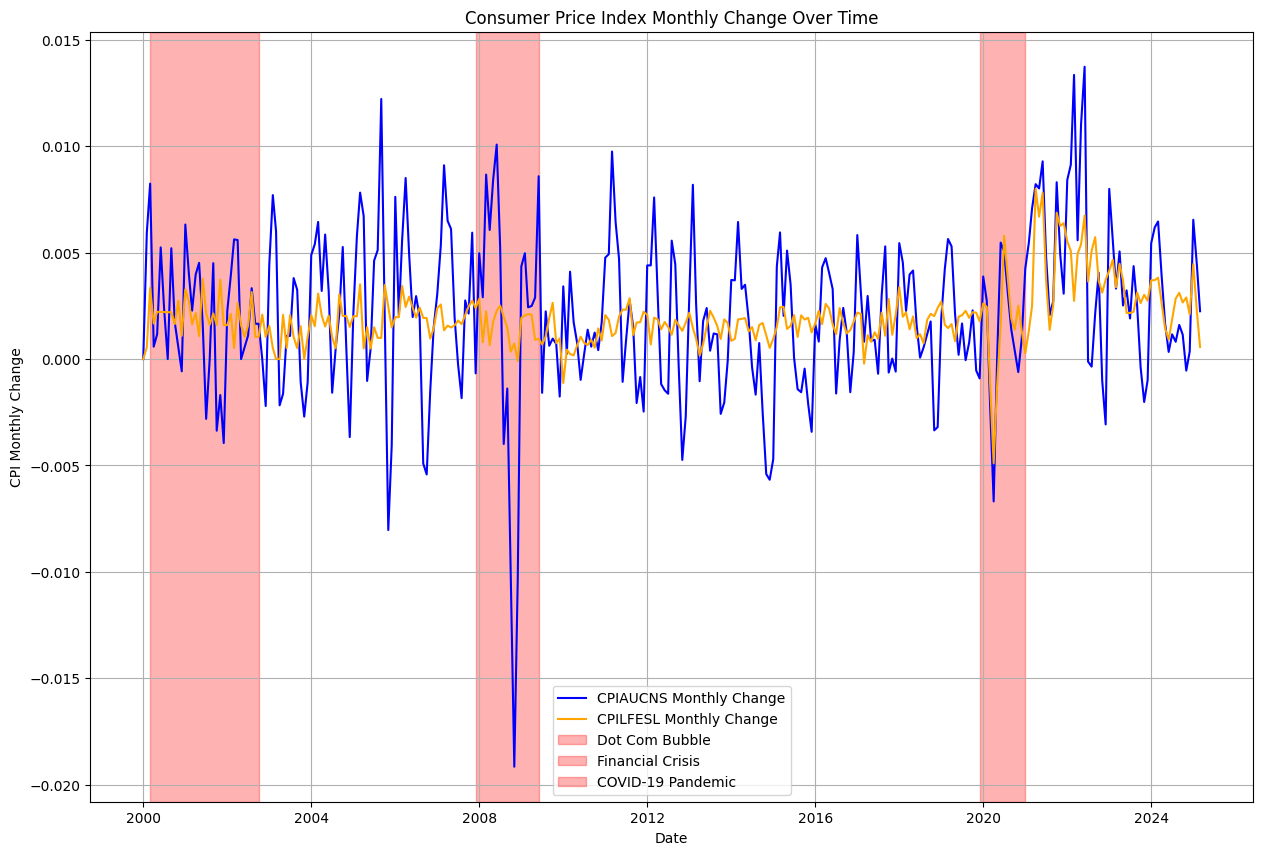

In [6]:
# Now that the data is imported, let's graph and notice some fundamental correlations.
# We'll also want to highlight important time periods, like the dot com bubble burst, the 2008 financial crisis, and covid

import matplotlib.pyplot as plt
import matplotlib.dates as mdates

notable_date_ranges = {
    "Dot Com Bubble": ("2000-03-01", "2002-10-01"),
    "Financial Crisis": ("2007-12-01", "2009-06-01"),
    "COVID-19 Pandemic": ("2019-12-01", "2021-01-01")
}
# Plot the CPIs on the same graph
plt.figure(figsize=(15, 10))
plt.plot(CPIAUCNS["DATE"], CPIAUCNS["CPIAUCNS"], label="CPIAUCNS", color="blue")
plt.plot(CPILFESL["DATE"], CPILFESL["CPILFESL"], label="CPILFESL", color="orange")
# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Consumer Price Index Over Time")
plt.xlabel("Date")
plt.ylabel("CPI")
plt.legend()
plt.grid()
plt.show()

# Then plot the change in CPIS
plt.figure(figsize=(15, 10))
plt.plot(CPIAUCNS_monthly_change["DATE"], CPIAUCNS_monthly_change["CPIAUCNS"], label="CPIAUCNS Monthly Change", color="blue")
plt.plot(CPILFESL_monthly_change["DATE"], CPILFESL_monthly_change["CPILFESL"], label="CPILFESL Monthly Change", color="orange")
# Highlight notable date ranges
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Consumer Price Index Monthly Change Over Time")
plt.xlabel("Date")
plt.ylabel("CPI Monthly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on CPI over time.
- CPI Tends to dip during the recessions, due to the economic nature of them.
- Additionally, looking at the post-covid time frame tells us that CPI goes up during inflationary periods (ie stimulus checks)
- Seasonally adjusted (less food and energy) is much more robust, and shows smaller changes month over month.
- We can look for CPI having a low or negative change MoM as an indicator of recession-like regimes, but it is important that this change persists over several months, otherwise the change is likely just noise.

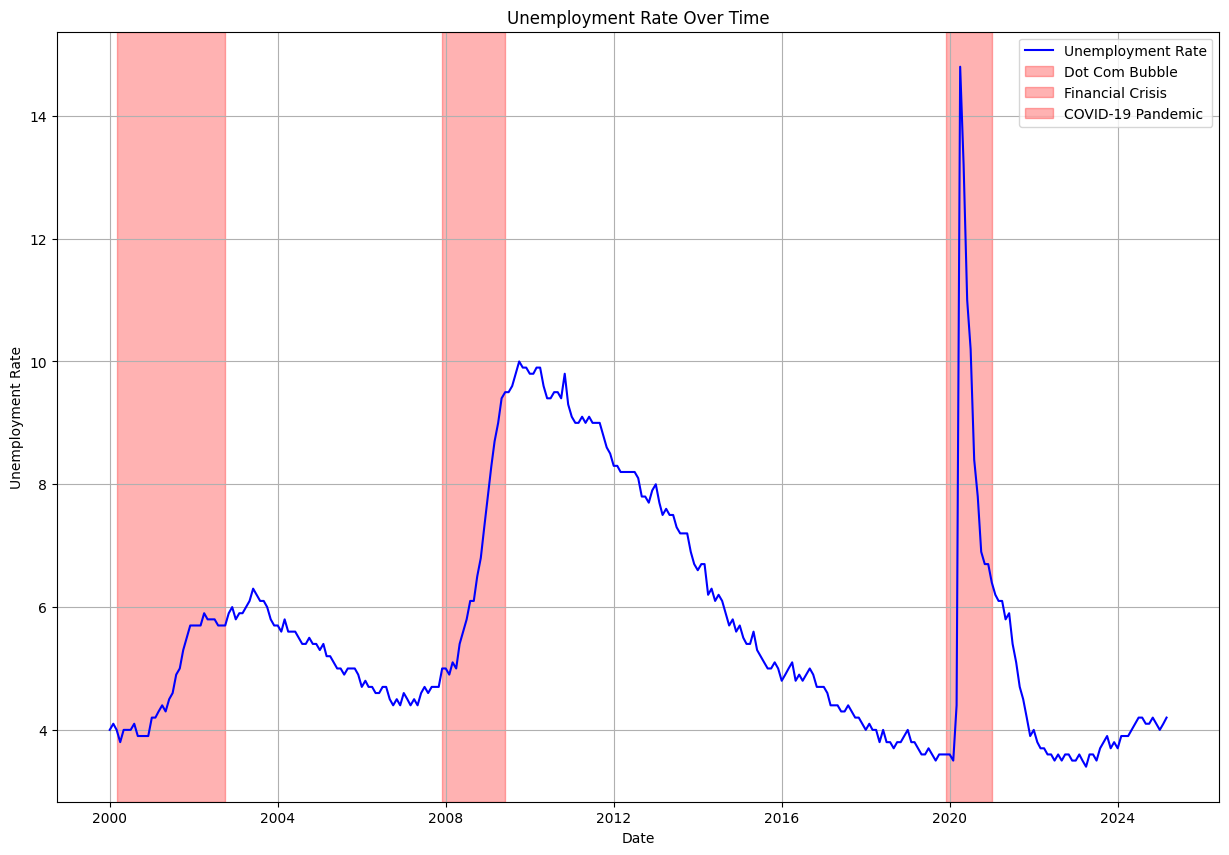

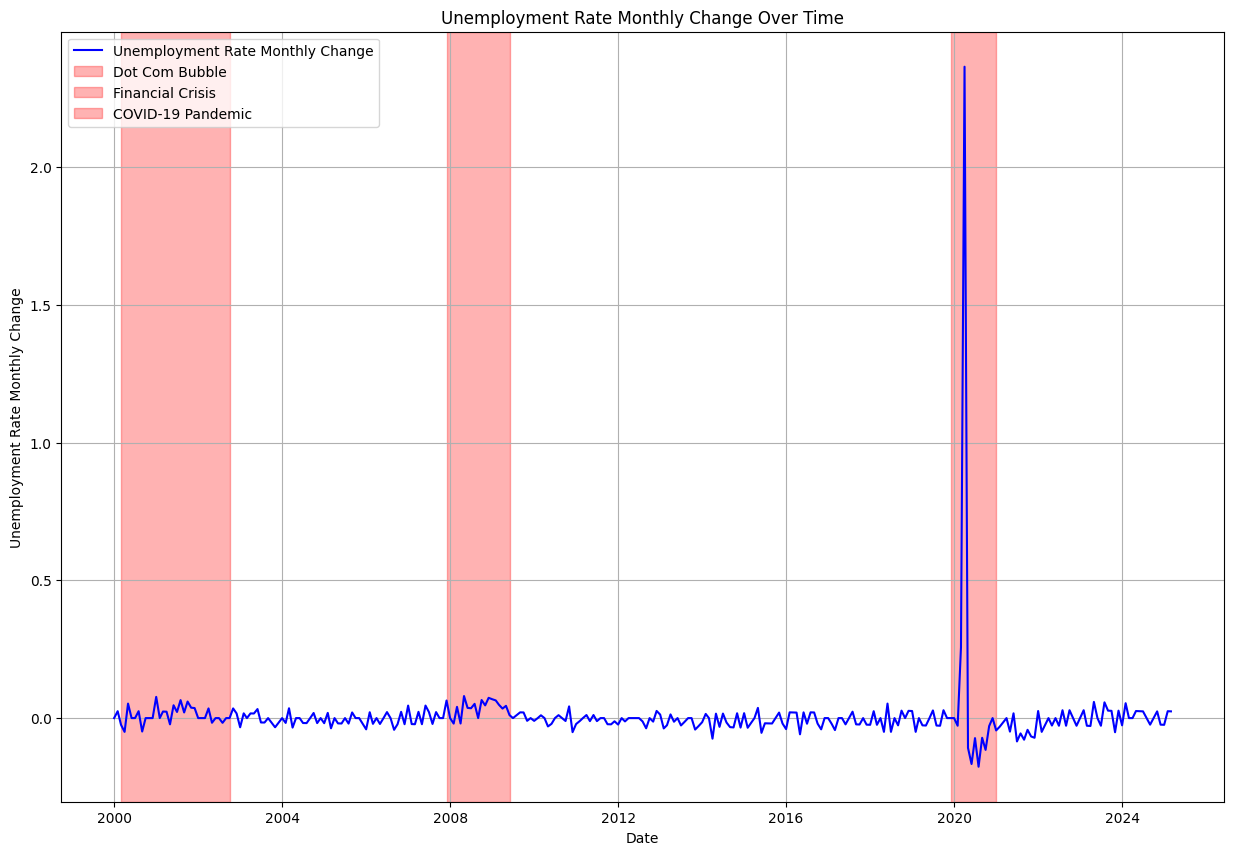

In [7]:
# Now lets look at the unemployment rate
plt.figure(figsize=(15, 10))
plt.plot(UNRATE["DATE"], UNRATE["UNRATE"], label="Unemployment Rate", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Unemployment Rate Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate")
plt.legend()
plt.grid()
plt.show()

# Now lets look at the change in unemployment rate
plt.figure(figsize=(15, 10))
plt.plot(UNRATE_monthly_change["DATE"], UNRATE_monthly_change["UNRATE"], label="Unemployment Rate Monthly Change", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("Unemployment Rate Monthly Change Over Time")
plt.xlabel("Date")
plt.ylabel("Unemployment Rate Monthly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on Unemployment rate over time.
- Unemployment is VERY visibly tied to recession time periods. Recession --> high unemplyment rate.
- In terms of monthly changes, we want to look for consistent negative changes. However I think we should focus directly on the Unemployment Rate, instead of the change month over month. The change seems a layer too far abstracted to hold enough information.

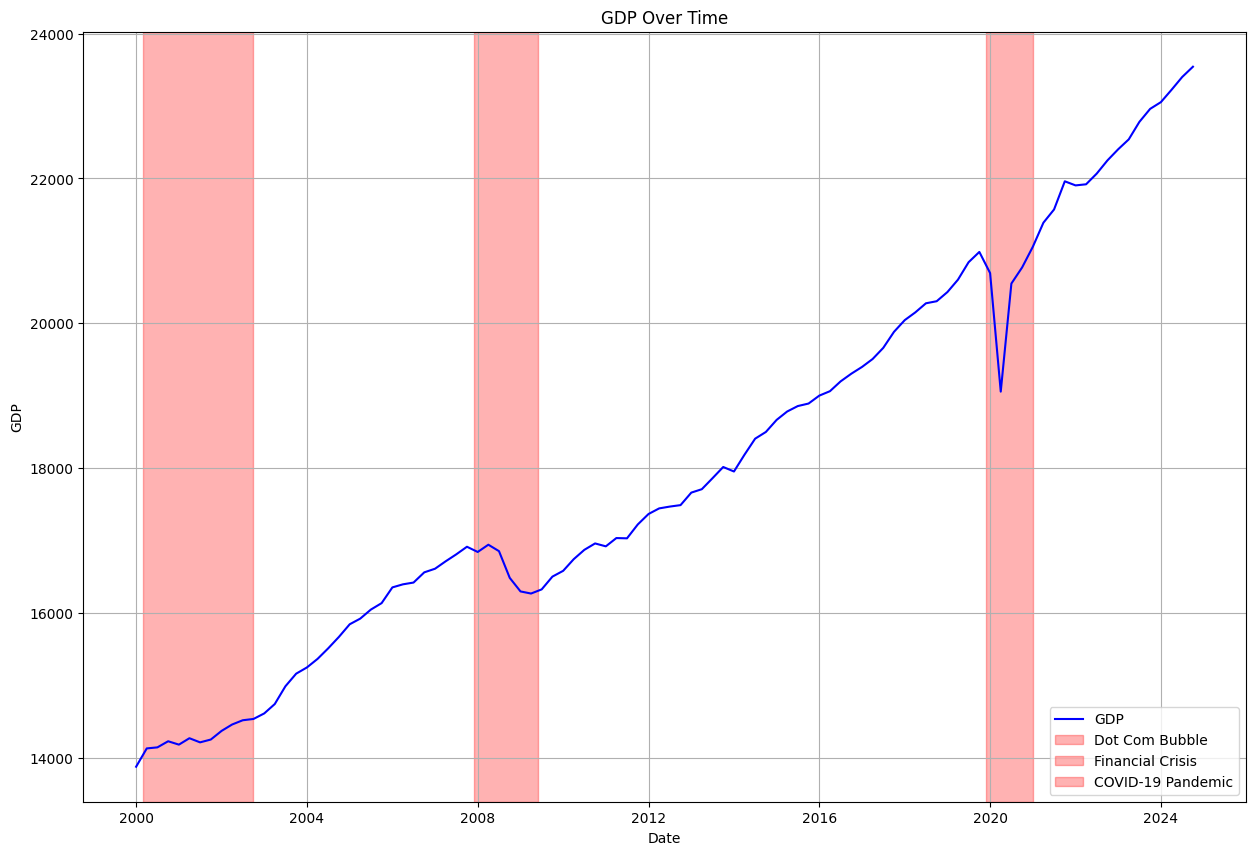

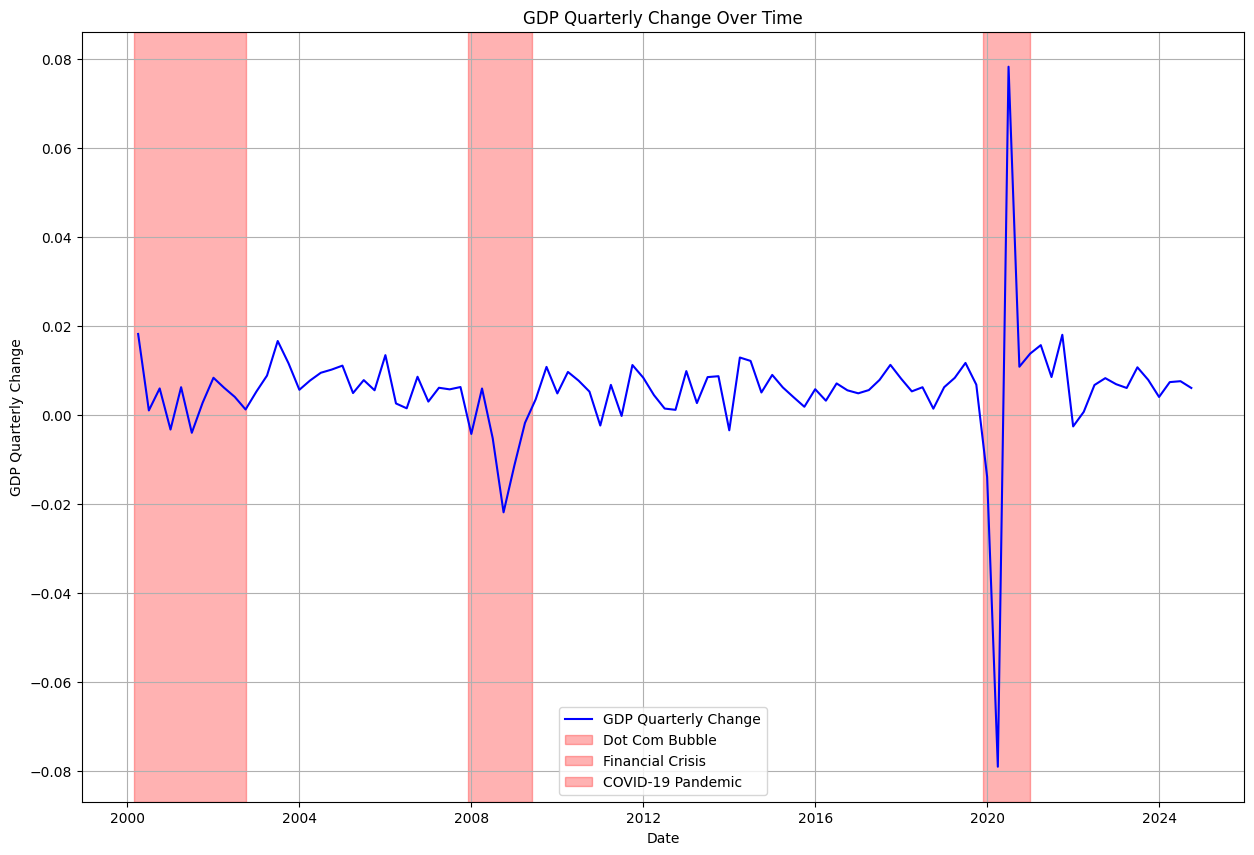

In [8]:
# Now lets look at the GDP
plt.figure(figsize=(15, 10))
plt.plot(GDP["DATE"], GDP["GDPC1"], label="GDP", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("GDP Over Time")
plt.xlabel("Date")
plt.ylabel("GDP")
plt.legend()
plt.grid()
plt.show()

# Now lets look at the change in GDP
plt.figure(figsize=(15, 10))
plt.plot(GDP_quarterly_change["DATE"], GDP_quarterly_change["GDP"], label="GDP Quarterly Change", color="blue")
for label, (start, end) in notable_date_ranges.items():
    plt.axvspan(pd.to_datetime(start), pd.to_datetime(end), color='red', alpha=0.3, label=label)

plt.title("GDP Quarterly Change Over Time")
plt.xlabel("Date")
plt.ylabel("GDP Quarterly Change")
plt.legend()
plt.grid()
plt.show()

### Notes on GDP:
- GDP is also closely tied to recessionary periods (as expected by definition). We want to look for consecutive quarters of negative GDP change.